<a href="https://colab.research.google.com/github/everettbergeson/reinforcement_learning/blob/main/falling_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

In [ ]:
score = 0
i = 0
states = []
block = np.array([0,5])
grid = np.zeros((15, 10))
grid[block[0], block[1]] = 1
falling = True

while True:
  move = np.random.choice(3)
  states.append([grid, score])
  grid = grid.copy()
  # If we're falling
  if falling:
    # Look to see if the next spot is available
    # If it's not, we're not falling anymore, we've landed.
    if  block[0] >= len(grid) - 1 or grid[block[0] + 1, block[1]] == 1:
      falling = False
    # If the row is full, shift the entire grid down by 1
      if np.sum(grid[block[0]]) == len(grid[0]):
         grid[1:block[0]+1] = grid[:block[0]]
         grid[0] = np.zeros_like(grid[0])
         score += 1
    # Otherwise, delete where we just came from and move to the next square
    else:
      grid[block[0], block[1]] = 0
      block += np.array([1,0])
      grid[block[0], block[1]] = 1
      i += 1
      # Look for a move
      if move == 1:
        # Check the border of the screen
        # Check that the square next to it isn't
        if block[1] != 0 and grid[block[0], block[1]-1] != 1:
          block -= np.array([0,1])
          grid[block[0], block[1] + 1] = 0
          grid[block[0], block[1]] = 1
      elif move == 2:
        if block[1] != len(grid[0]) - 1 and grid[block[0], block[1]+1] != 1:
          block += np.array([0,1])
          grid[block[0], block[1] - 1] = 0
          grid[block[0], block[1]] = 1


  # If we're not falling anymore, check to see if there is a brick in the top spot
  else:
    # If there's a brick in the top spot, game over
    if grid[0,5] == 1:
      print("GAME OVER")
      break
    else:
      block = np.array([0,5])
      grid[block[0], block[1]] = 1
      falling = True

GAME OVER


In [ ]:
len(states), states[-1][-1]

(735, 1)

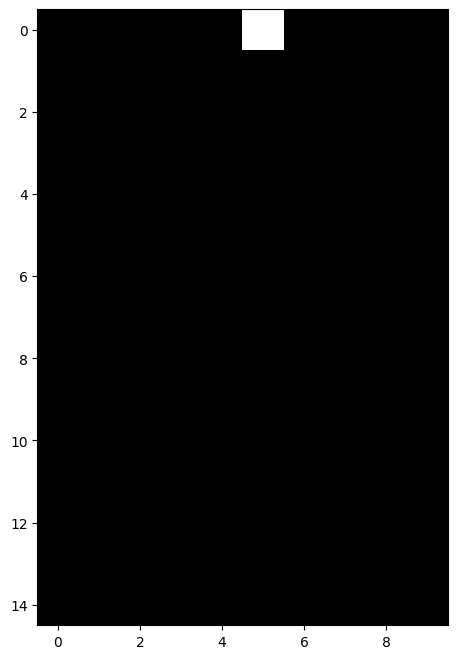

In [ ]:
snapshots = [i for i, j in states]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, cmap='gray', animated=True)

def animate_func(i):
    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig,
                               animate_func,
                               interval=50,
                               frames = len(states)
                               )

anim.save('test_anim.mp4')